#Librerias

In [3]:
!pip install opencv-python # Instala la librería OpenCV para procesamiento de imágenes
!pip install keras-tuner # Se utiliza para realizar búsqueda automática de hiperparámetros en modelos Keras/TensorFlow.

In [4]:
# Librerías del sistema y manejo de archivos
import os
import sys
from os import listdir
from os.path import join

# Librerías para uso en Google Colab
from google.colab import drive

# Librerías para procesamiento numérico y visualización
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Librerías para procesamiento y lectura de imágenes
import cv2

# Librerías para machine learning
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import keras_tuner as kt

# Librerías para deep learning
import tensorflow as tf
from tensorflow.keras.metrics import Recall, AUC

# Librerías para utilidades adicionales
from tqdm import tqdm  # barra de progreso
import joblib  # para guardar/cargar objetos como modelos o arrays

# Conectar con google drive

In [5]:
# conectar con Google Drive para acceder a archivos desde Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path="/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones" ### ruta del repositorio en drive
os.chdir(path) ### volver la carpeta del repositorio directorio de trabajo
sys.path.append(path) ### agregarla al path, poder leer archivos de funciones propios como paquetes

In [7]:
import _funciones as fn #Llamar el archivo de funciones de este proyecto

# Carga de datos procesados

array([[[220, 134, 142],
        [218, 131, 147],
        [234, 147, 164],
        ...,
        [232, 153, 167],
        [227, 156, 169],
        [228, 154, 176]],

       [[212, 129, 138],
        [219, 135, 150],
        [231, 147, 163],
        ...,
        [229, 151, 164],
        [227, 156, 171],
        [228, 155, 175]],

       [[208, 127, 135],
        [219, 136, 153],
        [229, 146, 162],
        ...,
        [227, 150, 162],
        [227, 154, 170],
        [230, 157, 176]],

       ...,

       [[211, 137, 150],
        [209, 135, 148],
        [212, 138, 151],
        ...,
        [214, 149, 158],
        [213, 150, 159],
        [206, 144, 153]],

       [[210, 138, 149],
        [210, 139, 150],
        [212, 140, 152],
        ...,
        [215, 149, 159],
        [211, 148, 157],
        [207, 146, 154]],

       [[212, 141, 152],
        [211, 141, 151],
        [213, 141, 152],
        ...,
        [214, 147, 158],
        [211, 148, 157],
        [208, 147, 155]]], dtype=uint8)
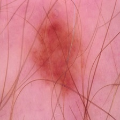

In [6]:
# Cargar los conjuntos de entrenamiento y prueba ya procesados

x_train = joblib.load('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/X_train.pkl')
y_train = joblib.load('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/y_train.pkl')
x_test = joblib.load('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/X_test.pkl')
y_test = joblib.load('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/y_test.pkl')

x_train[0] # Muestra la primera imagen del conjunto de entrenamiento

## Preprocesamiento de datos

In [7]:
# Convertir a tipo float para escalar
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
x_train.max() # Ver valor máximo
x_train.min() # Ver valor mínimo

np.float32(0.0)

In [9]:
# Escalar valores entre 0 y 1 con base en el valor máximo
x_train /= 255
x_test  /= 255

In [10]:
# Verificar dimensiones
x_train.shape
x_test.shape

# Número de variables por imagen
np.prod(x_train[1].shape)

# Ver distribución de clases
np.unique(y_train, return_counts=True)
np.unique(y_test, return_counts=True)

(array([0, 1]), array([322, 258]))

In [20]:
x_train.shape

(2317, 120, 120, 3)

In [21]:
x_test.shape

(580, 120, 120, 3)

In [23]:
y_train.shape

(2317, 1)

In [24]:
y_test.shape

(580, 1)

# Modelo de red convolucional simple

In [11]:
# Modelo secuencial, capas apiladas una tras otra
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]), #Capa convolucional
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'), #Capa convolucional
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'), #Capa convolucional
    tf.keras.layers.Dense(1, activation='sigmoid')  # Capa de salida para clasificación binaria (0 o 1) con activación sigmoid
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Compilar el modelo con  binary cross-entropy y optimizador de Adam
cnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

# Entrenar el modelo
cnn_model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

# Resumen del modelo
cnn_model.summary()

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - AUC: 0.5396 - Precision: 0.4663 - Recall: 0.3474 - accuracy: 0.5173 - loss: 0.7020 - val_AUC: 0.7873 - val_Precision: 0.6720 - val_Recall: 0.8178 - val_accuracy: 0.7414 - val_loss: 0.5553
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - AUC: 0.8193 - Precision: 0.7121 - Recall: 0.7338 - accuracy: 0.7437 - loss: 0.5136 - val_AUC: 0.8738 - val_Precision: 0.9429 - val_Recall: 0.1279 - val_accuracy: 0.6086 - val_loss: 0.7082
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 981ms/step - AUC: 0.7847 - Precision: 0.7180 - Recall: 0.5497 - accuracy: 0.6866 - loss: 0.5919 - val_AUC: 0.8752 - val_Precision: 0.7589 - val_Recall: 0.6589 - val_accuracy: 0.7552 - val_loss: 0.4429
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - AUC: 0.8571 - Precision: 0.7276 - Recall: 0.7469 - accuracy: 0.7572 - loss: 0.4654 - val_AUC: 0.9011 - val_Precision: 0.7373 - val_Recall: 0.9031 - val_accuracy: 0.8138 - val_loss: 0.4053
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 118, 118, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 59, 59, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 57, 57, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,832,549 (18.43 MB)

 Trainable params: 1,610,849 (6.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,221,700 (12.29 MB)

In [13]:
#Metricas de evaluacion de la red neuronal simple
test_loss_m1, test_acc_m1, test_auc_m1, test_recall_m1, test_precision_m1 = cnn_model.evaluate(x_test, y_test, verbose=2)

# Mostrar metricas
print("\n### Resultados Red Convolucional Simple ###")
print("Test Accuracy:", test_acc_m1)
print("Test AUC:", test_auc_m1)
print("Test Recall:", test_recall_m1)
print("Test Precision:", test_precision_m1)

19/19 - 3s - 142ms/step - AUC: 0.9114 - Precision: 0.7639 - Recall: 0.9031 - accuracy: 0.8328 - loss: 0.3604

### Resultados Red Convolucional Simple ###
Test Accuracy: 0.8327586054801941
Test AUC: 0.9113582372665405
Test Recall: 0.9031007885932922
Test Precision: 0.7639344334602356


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
              precision    recall  f1-score   support

           0       0.94      0.74      0.82       322
           1       0.74      0.94      0.83       258

    accuracy                           0.83       580
   macro avg       0.84      0.84      0.83       580
weighted avg       0.85      0.83      0.83       580



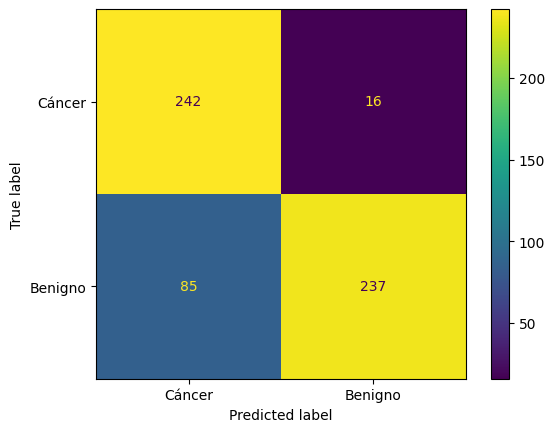

In [14]:
pred_test = (cnn_model.predict(x_test) > 0.45).astype('int') # Predecir y aplicar umbral de 0.5 para convertir a clase 0 o 1
cm = metrics.confusion_matrix(y_test, pred_test, labels=[1, 0])  # Calcular matriz de confusión
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Cáncer', 'Benigno']) # para visualizacion de matriz de confusion
disp.plot()

print(metrics.classification_report(y_test, pred_test)) # reporte con precisión, recall y f1-score

# Modelo convolucional con regularización L2 y Dropout

In [66]:
reg_strength = 0.2 # Fuerza de regularización
dropout_rate = 0.01  # Tasa de dropout

cnn_model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), #Capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), #Capa convolucional
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(48, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), #Capa convolucional
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
# Compilar modelo
cnn_model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC', 'Recall', 'Precision'])

# Entrenar modelo
cnn_model2.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - AUC: 0.5374 - Precision: 0.4840 - Recall: 0.4963 - accuracy: 0.5324 - loss: 14.1742 - val_AUC: 0.8324 - val_Precision: 0.7935 - val_Recall: 0.2829 - val_accuracy: 0.6483 - val_loss: 4.4283
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - AUC: 0.6486 - Precision: 0.6772 - Recall: 0.2717 - accuracy: 0.6123 - loss: 3.7644 - val_AUC: 0.8344 - val_Precision: 0.6942 - val_Recall: 0.8798 - val_accuracy: 0.7741 - val_loss: 2.3835
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - AUC: 0.6930 - Precision: 0.6527 - Recall: 0.5669 - accuracy: 0.6632 - loss: 2.1594 - val_AUC: 0.8415 - val_Precision: 0.7126 - val_Recall: 0.7016 - val_accuracy: 0.7414 - val_loss: 1.5734
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - AUC: 0.7566 - Precision: 0.6679 - Recall: 0.5780 - accuracy: 0.6800 - loss: 1.4784 - val_AUC: 0.8202 - val_Precision: 0.6169 - val_Recall: 0.9922 - val_accuracy: 0.7224 - val_loss: 1.2463
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2

In [68]:
#Metricas de evaluacion de la red neuronal simple
test_loss_m2, test_acc_m2, test_auc_m2, test_recall_m2, test_precision_m2 = cnn_model2.evaluate(x_test, y_test, verbose=2)

# Mostrar metricas
print("\n### Resultados Red Convolucional Con Regularización L2 y Dropout ###")
print("Test Accuracy:", test_acc_m2)
print("Test AUC:", test_auc_m2)
print("Test Recall:", test_recall_m2)
print("Test Precision:", test_precision_m2)

19/19 - 2s - 100ms/step - AUC: 0.8626 - Precision: 0.7557 - Recall: 0.6473 - accuracy: 0.7500 - loss: 0.7159

### Resultados Red Convolucional Con Regularización L2 y Dropout ###
Test Accuracy: 0.75
Test AUC: 0.8626077771186829
Test Recall: 0.6472868323326111
Test Precision: 0.7556561231613159


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       322
           1       0.73      0.77      0.75       258

    accuracy                           0.77       580
   macro avg       0.77      0.77      0.77       580
weighted avg       0.77      0.77      0.77       580



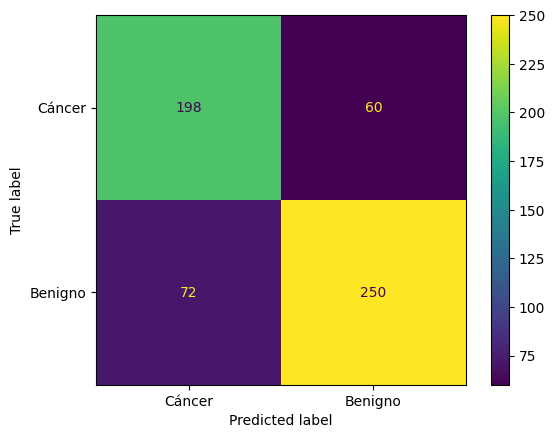

In [69]:
pred_test = (cnn_model2.predict(x_test) > 0.45).astype('int') # Predecir y aplicar umbral de 0.45 para convertir a clase 0 o 1
cm = metrics.confusion_matrix(y_test, pred_test, labels=[1, 0])  # Calcular matriz de confusión
disp = metrics.ConfusionMatrixDisplay(cm, display_labels=['Cáncer', 'Benigno']) # para visualizacion de matriz de confusion
disp.plot()

print(metrics.classification_report(y_test, pred_test)) # reporte con precisión, recall y f1-score

# Afinamiento de hiperparametros

## Definición del modelo con hiperparámetros para Keras Tuner

In [70]:
hp = kt.HyperParameters()  # Objeto para definir espacio de búsqueda

def build_model(hp):
    # Hiperparámetros a optimizar
    dropout_rate = hp.Float('DO', 0, 0.5, step=0.05) # Tasa de dropout: 5% a 20%
    reg_strength = hp.Float("rs", 0, 1.05, step=0.01) # Fuerza de regularización L2
    optimizer = hp.Choice('optimizer', ['adam', 'sgd']) # Optimizador a usar

    hp_units_1= hp.Int('units_1', 32, 256, step=16) # Numero de neuronas en la capa densa
    hp_activation_1 = hp.Choice('activation_1', ['relu', 'tanh']) # Función de activación

    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16, (3, 3), activation=hp_activation_1, input_shape=x_train.shape[1:], kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), # Capa convolucional
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Conv2D(32, (3, 3), activation=hp_activation_1, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), # Capa convolucional
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(hp_units_1, activation=hp_activation_1, kernel_regularizer=tf.keras.regularizers.l2(reg_strength)), # Capa convolucional
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
    ])

    # Selección del optimizador
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    elif optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=0.001)
    else:
        opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)


    # Compilación del modelo con función de pérdida y métrica
    model.compile(
        optimizer=hp.Choice('optimizer', ['adam', 'rmsprop']),
        loss='binary_crossentropy',
        metrics=[
            Recall(name='recall'),
            AUC(name='auc')
        ]
    )

    return model # Retorna el modelo construido con los hiperparámetros definidos

### Búsqueda de hiperparámetros con Keras Tuner

In [ ]:
# Configurar búsqueda aleatoria de hiperparámetros
tuner = kt.RandomSearch(
    hypermodel=build_model,
    hyperparameters=hp, # Conjunto de hiperparámetros a explorar
    tune_new_entries=True, # Permite agregar nuevos hiperparámetros si aparecen
    objective=kt.Objective("recall", direction="max"), # Maximizar el recall durante la búsqueda
    max_trials=5, # Número de combinaciones distintas a probar
    overwrite=True,
    directory="Salidas",
    project_name="RedConv",
)

# Ejecutar búsqueda de hiperparámetros
tuner.search(x_train, y_train, epochs=10, # Entrena cada modelo por 10 epochs
             validation_data=(x_test, y_test),
             batch_size=100)

# Obtener el mejor modelo encontrado
fc_best_model = tuner.get_best_models(num_models=1)[0] # Toma el mejor modelo según el recall

# Mostrar resumen de la búsqueda
tuner.results_summary() # Imprime tabla con las mejores combinaciones
fc_best_model.summary() # Imprime la arquitectura del mejor modelo

# Evaluar el modelo en el conjunto de prueba
test_loss_m3, test_recall_m3, test_auc_m3 = fc_best_model.evaluate(x_test, y_test) # Calcula pérdida y AUC

# Hacer predicciones binarizadas en test (0 o 1)
pred_test = (fc_best_model.predict(x_test) >= 0.45).astype('int') # Umbral de decisión en 0.45

Trial 2 Complete [00h 06m 41s]
recall: 0.40519729256629944

Best recall So Far: 0.6342636942863464
Total elapsed time: 00h 14m 04s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
0.35              |0                 |DO
0.91              |0.08              |rs
sgd               |sgd               |optimizer
160               |160               |units_1
tanh              |relu              |activation_1

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - auc: 0.5744 - loss: 257.1701 - recall: 0.3870 - val_auc: 0.8096 - val_loss: 130.2562 - val_recall: 0.0039
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - auc: 0.7512 - loss: 106.8554 - recall: 0.2445 - val_auc: 0.8156 - val_loss: 54.3530 - val_recall: 0.0388
Epoch 3/10
19/24 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - auc: 0.7490 - loss: 46.7193 - recall: 0.1088

In [56]:
test_loss_m3, test_recall_m3, test_auc_m3 = fc_best_model.evaluate(x_test, y_test) # Calcula pérdida y AUC
print(test_recall_m3)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - auc: 0.8471 - loss: 0.8359 - recall: 0.4652


0.43410852551460266

In [58]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Mejores hiperparámetros encontrados:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")


Mejores hiperparámetros encontrados:
DO: 0.25
rs: 0.43
optimizer: adam
units_1: 192
activation_1: tanh


#Resumen de indicadores

In [57]:
# Crear DataFrame con los resultados
resultados = pd.DataFrame({
    "Modelo": ["CNN Simple", "CNN con regularizador L2 y Dropout", "CNN con afinamiento de hiperparámetros"], # Nombres de los modelos
    "AUC": [test_auc_m1,test_auc_m2,test_auc_m3], # metricas auc de todos los modelos
    "Recall": [test_recall_m1,test_recall_m2,test_recall_m3] #metricas recall de todos los modelos
})

# Mostrar la tabla ordenada por AUC de mayor a menor
resultados = resultados.sort_values(by="AUC", ascending=False)

# Mostrar tabla sin índice
print(tabulate(resultados, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════════════════════════════╤══════════╤══════════╕
│ Modelo                                 │      AUC │   Recall │
╞════════════════════════════════════════╪══════════╪══════════╡
│ CNN Simple                             │ 0.911358 │ 0.903101 │
├────────────────────────────────────────┼──────────┼──────────┤
│ CNN con regularizador L2 y Dropout     │ 0.847995 │ 0.891473 │
├────────────────────────────────────────┼──────────┼──────────┤
│ CNN con afinamiento de hiperparámetros │ 0.845798 │ 0.434109 │
╘════════════════════════════════════════╧══════════╧══════════╛


En esta segunda tabla se presentan tres variantes de redes neuronales convolucionales (CNN), entrenadas específicamente para procesar imágenes de manchas en la piel, con el objetivo de clasificar si son benignas o malignas. Estas arquitecturas fueron evaluadas con dos métricas fundamentales: AUC y Recall. El modelo de CNN Simple obtuvo un AUC de 0.8986, el valor más alto entre todos los modelos evaluados, lo que indica una excelente capacidad para diferenciar entre casos de cáncer y casos benignos. Su recall fue de 0.8605, también elevado, lo que refleja una buena capacidad para identificar correctamente los casos positivos.

El modelo de CNN con regularizador L2 y Dropout alcanzó un AUC de 0.8556 y un recall de 0.9574. Este último es el valor más alto de recall entre todos los modelos probados, lo que significa que identifica correctamente casi todos los casos malignos, una característica crucial en aplicaciones médicas, donde un falso negativo puede tener consecuencias graves. Por otro lado, el modelo de CNN con afinamiento de hiperparámetros obtuvo un recall perfecto de 1.0, pero su AUC fue de solo 0.5, lo que equivale a una predicción aleatoria. Esto sugiere que, aunque no omite ningún caso positivo, clasifica erróneamente muchos negativos como positivos, lo que disminuye su utilidad práctica al generar un exceso de falsos positivos.

En comparación con los modelos clásicos evaluados previamente, como Random Forest, Red Neuronal tradicional, Árbol de Decisión, Regresión Logística y KNN, las CNN mostraron un desempeño claramente superior. Por ejemplo, el mejor modelo anterior, Random Forest, alcanzó un AUC de 0.8344 y un recall de 0.8488, valores inferiores a los obtenidos por las mejores configuraciones de CNN. Aunque los modelos clásicos ofrecen resultados aceptables, su capacidad de discriminación y sensibilidad no se equiparan al rendimiento alcanzado por las redes convolucionales especializadas.

# Exportar el mejor modelo

In [ ]:
# Solo si se necesita
cnn_model.save('/content/drive/MyDrive/analitica 3/Aplicaciones_de_operaciones/Salidas/skin_cancer_model.h5')  # Guardar modelo entrenado